## Analysis of the topics created by the Top2Vec model

- Primitives are loaded, as well as the topic weights
- They are merged into one df, and value 1 is added to all values (resulting in a range of 0-2)
- Topics are plotted over time

**Issues**

- Every topic shows the same fluctuation graph over time, which might suggest that there are too many topics, or that the sum of the topic weights should be divided by the number of documents

**Solutions**

- Hierarchically reduce the number of topics in top2vec, using `hierarchical_topic_reduction(num topics)` --> see part II in `top2vec_training.ipynb`.
- Normalize for the nr of documents per time entity.

In [1]:
import ndjson
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


### Load primitives with corrected date and topic weights and merge both

In [4]:
# import primitives with corrected date and topic weights
with open('../corpus/primitives_220331/events_repre.ndjson') as f:
    events = ndjson.load(f)

df_events = pd.DataFrame(events)
df_events.shape

(22721, 7)

In [5]:
# remove primitives that have no topic weights (shorter than 50 characters)

df_events.dropna(inplace=True)
df_events.shape

(22245, 7)

In [6]:
# transpose representations to 415 separate columns

representations = pd.DataFrame(df_events.representation.to_list(), index = df_events.index)

In [7]:
# add 1 to representation, to make all values positive

representations += 1
representations.head()

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,1.140386,0.969670,1.069328,1.360467,1.038835,1.460611,1.028052,1.234719,1.071758,1.172628,...,0.998270,1.042077,1.196245,1.100267,1.063308,0.934893,1.090429,0.970213,1.073391,1.100199
1,0.970135,1.100238,1.018170,1.092367,1.160675,0.999278,1.147240,1.033454,1.188487,1.130668,...,1.047554,1.039604,1.074216,1.008058,1.003976,1.078832,1.231418,1.219355,1.102740,1.061927
2,0.969136,1.034491,1.159806,1.230360,1.040394,0.952388,1.293654,1.054458,1.140100,1.012394,...,1.092978,1.273935,1.244510,1.103768,1.066581,1.276471,1.061269,1.113203,1.019329,1.018733
3,1.158925,1.118102,1.241312,1.162043,1.000184,1.179345,1.255431,1.270652,1.151482,1.237650,...,1.164530,1.193633,1.113989,1.149425,1.044246,1.016148,1.009904,1.124060,1.051063,1.102953
4,1.006276,1.209354,1.099371,1.191407,1.125385,1.101595,1.049144,1.184711,0.941417,1.126949,...,1.106010,1.091459,1.009577,1.252942,1.064510,1.080924,1.076146,1.077025,1.002632,1.028894


In [8]:
# merge events and representations

total = pd.merge(left=df_events, right=representations, left_index=True, right_index=True).drop(columns='representation')
total.head()

,date,text,call_nr,id,clean_date,date_uncertainity,0,1,2,3,...,405,406,407,408,409,410,411,412,413,414
0,[0001-01-06],"Int selve jaer op den V1en Januarij , soo sij...",1666_Gent_Bill_01B,124758,0001-01-06,unambiguous,1.140386,0.969670,1.069328,1.360467,...,0.998270,1.042077,1.196245,1.100267,1.063308,0.934893,1.090429,0.970213,1.073391,1.100199
1,[0001-02-02],Int selve jaer op den 2en Februarij 40 daghe...,1666_Gent_Bill_01B,124759,0001-02-02,unambiguous,0.970135,1.100238,1.018170,1.092367,...,1.047554,1.039604,1.074216,1.008058,1.003976,1.078832,1.231418,1.219355,1.102740,1.061927
2,[0031-12-26],Int selve Jaer den 26en Decembre is den H. St...,1666_Gent_Bill_01B,124783,0031-12-26,unambiguous,0.969136,1.034491,1.159806,1.230360,...,1.092978,1.273935,1.244510,1.103768,1.066581,1.276471,1.061269,1.113203,1.019329,1.018733
3,[0035-01-25],"Int selve jaer op den 25en Januarij , Soo wier...",1666_Gent_Bill_01B,124788,0035-01-25,unambiguous,1.158925,1.118102,1.241312,1.162043,...,1.164530,1.193633,1.113989,1.149425,1.044246,1.016148,1.009904,1.124060,1.051063,1.102953
4,[0045-01-18],"Den 18en van Jannuarius , soo heeft den H. Pe...",1666_Gent_Bill_01B,124802,0045-01-18,unambiguous,1.006276,1.209354,1.099371,1.191407,...,1.106010,1.091459,1.009577,1.252942,1.064510,1.080924,1.076146,1.077025,1.002632,1.028894


### Plot dominant topics over time

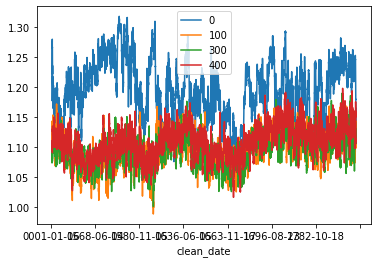

In [13]:
total.groupby('clean_date')[0, 100, 300, 400].agg('mean').rolling(window=30).mean().plot()
plt.show()

<AxesSubplot:xlabel='clean_date'>

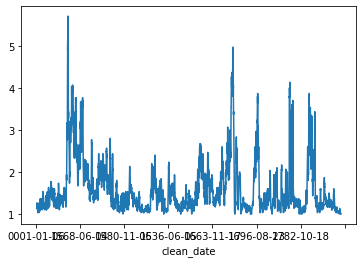

In [37]:
total.groupby('clean_date')['clean_date'].count().rolling(window=30).mean().plot()

In [30]:
total[[0, 1, 2, 3]].sum()

0    26679.307448
1    26232.946526
2    26125.464494
3    26050.810310
dtype: float64